<a href="https://colab.research.google.com/github/LucasPilla60/Procesamiento_de_Habla/blob/main/TP1_PIlla_Lucas_PH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 PROCESAMIENTO DEL HABLA

#**Pilla Lucas**



## 1- Webscrapping

##*Primero se instalan las librerias necesarias*


In [ ]:
!pip install requests
!pip install beautifulsoup4

##*Importamos las librerías*

In [ ]:
import requests
from bs4 import BeautifulSoup

##*Hacemos el pedido (request) a la pagina*
Descargamos el HTML de la pagina

In [49]:
# URL del discurso:
url = "https://innovationforsocialchange.org/tienes-que-encontrar-eso-que-amas-discurso-de-steve-jobs/"

# Hacemos solicitud HTTP
response = requests.get(url)

# Mostramos el estado de la respuesta
print("Estado de la respuesta:", response.status_code)

# Si aparece 200, significa que esta todo OK

Estado de la respuesta: 200


##*Parseamos el HTML con Beautifulsoup*
Con esto extraemos solo el contenido útil y no todo el html

In [77]:
# Parsear el contenido del HTML
soup = BeautifulSoup(response.text, 'html.parser')
# Busco todos los parrafos
paragraphs = soup.find_all('p')

# Juntamos todos los parrafos
text = " ".join([p.get_text() for p in paragraphs])

# Mostramos el texto para ver que bajamos
print(text[:500]) # Mostramos las primeras lineas

No sé cuántas veces habré visto este vídeo; el discurso de Steve Jobs es tan inspirador que  vale la pena escucharle una vez más.  Y esta vez quiero compartirlo contigo, con el texto completo en inglés y en español y una presentación que realicé el día de su muerte en un encuentro de emprendedores resumiendo sus principales consejos para innovar y emprender. [slideshare id=42676958&doc=10consejosparainnovaryemprender-141213135856-conversion-gate02]   Tengo el honor de estar hoy aquí con vosotros


## 2- Preprocesamiento

Limpiar y preparar el texto para la nuebe de palabras y hacer el analisis


### 2.1 Muestra las stop words que tenga tu texto.

In [78]:
from wordcloud import STOPWORDS as sw_en

# Lista de español (personalizada)
stop_es = {
    "con","que","los","para","un","una","el","la","en","y","o","de","a","se","es","al",
    "como","por","no","su","más","pero","si","este","esta","eso","esa","todo","todos",
    "todas","cada","cual","cualquier","algo","alguna","algún","ningún","ninguna","otro",
    "otros","otras","sobre","entre","durante","desde","hasta","también","así","mismo",
    "misma","tan","tanto","muy","poco","nada","solo","sola","siempre","nunca","jamás",
    "casi","aproximadamente","cerca","lejos","antes","después","ahora","hoy","ayer",
    "mañana","luego","mientras","sin","aunque","debido","gracias","porqué","cómo",
    "dónde","cuándo","quién","qué","cuál"
}

#Unión con inglés
stopwords = sw_en.union(stop_es)

#Chequeo
print(f"Total stopwords: {len(stopwords)}")


Total stopwords: 273


### 2.2 Quita las stop-words, caracteres extraños del texto. Utiliza el texto restante para crear una nube de palabras. Usa la biblioteca worldcloud de python.

In [63]:
import re
from wordcloud import wordcloud
import matplotlib.pyplot as plt

# Limpiar saltos y tabs
clean = re.sub(r'\n|\r|\t', ' ', text)

# Dividir en oraciones ANTES de quitar puntos
sentences_raw = [s.strip() for s in clean.split('.') if s.strip()]

# Limpiar cada oración (eliminar caracteres no alfanum, conservar acentos)
cleaned_sentences = [
    re.sub(r'[^a-zA-Z0-9áéíóúñÁÉÍÓÚÑ\s]', '', s).lower()
    for s in sentences_raw
]

In [82]:
#Unir todo para la nube
all_text = " ".join(cleaned_sentences)
all_text = re.sub(r'\d+', '', all_text)

#Filtrar stopwords

filtered_words = [w for w in all_text.split() if w not in stopwords]
text_filtered = " ".join(filtered_words)

##*Creamos la nube de palabras*

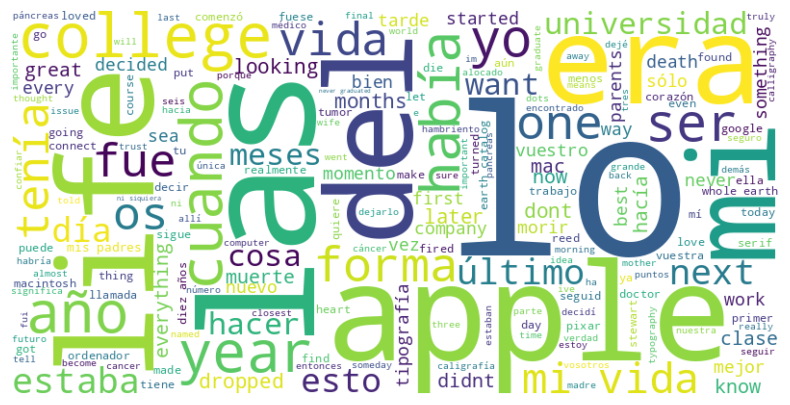

In [83]:
# Creamos la nube de palabras
wc = WordCloud(
    width=800, height=400,
    background_color="white",
    stopwords=stopwords
).generate(text_filtered)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

### 2.3 Usando el texto que conseguiste en el punto 1).



#### 2.3.1 Limpia y preprocesa el texto, descomponelo en oraciones, arma una matriz documento-vocabulario.


In [85]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
#Agrego una funcion para tokenizar
def tokenizer_nltk(doc):
    return [t for t in word_tokenize(doc) if t.isalnum() and t not in stopwords]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [86]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Reuso cleaned_sentences como docs
docs = cleaned_sentences

# Vectorizador de conteo
cv = CountVectorizer(tokenizer=tokenizer_nltk)
X_count = cv.fit_transform(docs)

# DataFrame para visualizar
df_count = pd.DataFrame(
    X_count.toarray(),
    index=[f"sent_{i+1}" for i in range(len(docs))],
    columns=cv.get_feature_names_out()
)
df_count.head()


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,000,10,17,18,1960s,2,20,30,33,35,...,youve,zanjados,ápice,época,éxito,última,último,últimos,única,útil
sent_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sent_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sent_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sent_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sent_5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



#### 2.3.2 Determina la longitud de tu vocabulario.

In [87]:
# Determinar la longitud del vocabulario
print("Cantidad de términos únicos:", len(cv.get_feature_names_out()))

Cantidad de términos únicos: 1327



#### 2.3.3. Aplica TF-IDF a tu matriz documento-vocabulario

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizador TF-IDF con el mismo tokenizer
tfidf = TfidfVectorizer(tokenizer=tokenizer_nltk)
X_tfidf = tfidf.fit_transform(docs)

df_tfidf = pd.DataFrame(
    X_tfidf.toarray(),
    index=[f"sent_{i+1}" for i in range(len(docs))],
    columns=tfidf.get_feature_names_out()
)
df_tfidf.head()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,000,10,17,18,1960s,2,20,30,33,35,...,youve,zanjados,ápice,época,éxito,última,último,últimos,única,útil
sent_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sent_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sent_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sent_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sent_5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Conclusiones

1) Aprendí que es importante dividir las oraciones antes de limpiar puntos.

2) Unos de los desafios con los que me encontré y tuve que recurrir a otras herramientas, fue ajustar regez y tokenizacion mixta (ES/EN) ya que, el discurso estaba en partes en español y en partes en ingles.

3) Si me surgen algunas dudas, por ejemplo, como se tratan las abreviaturas o nombres propios que contienen puntos?




# ENTREGA




# Anexo, código de ejemplo del uso de wordcloud

Instalar e importar la librería

In [ ]:
# instalar wordcloud
!pip install wordcloud


In [ ]:

# Importar librerías
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:

# Texto de ejemplo
text = "Este es un texto de ejemplo para crear una nube de palabras usando word cloud. Puedes reemplazar este texto utilizando tu propio texto."

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)


Mostramos la imagen generada

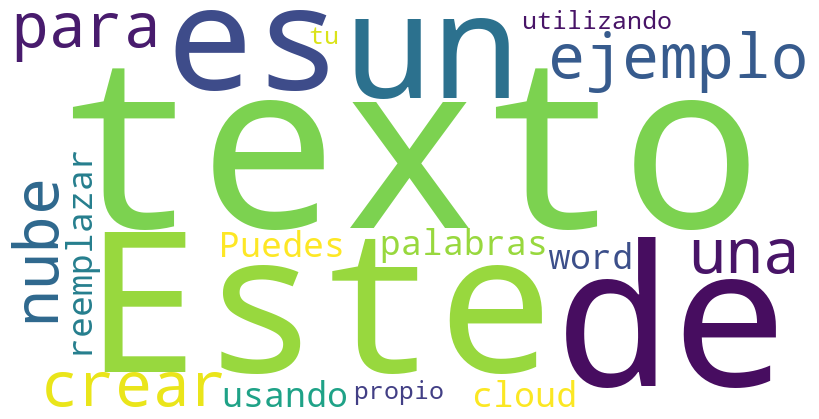

In [ ]:

# mostramos la imagen generada
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Modificamos el ejemplo anterior agregando palabras en español que no queremos que considere para crear la nube de palabras. Estas son las stop_words



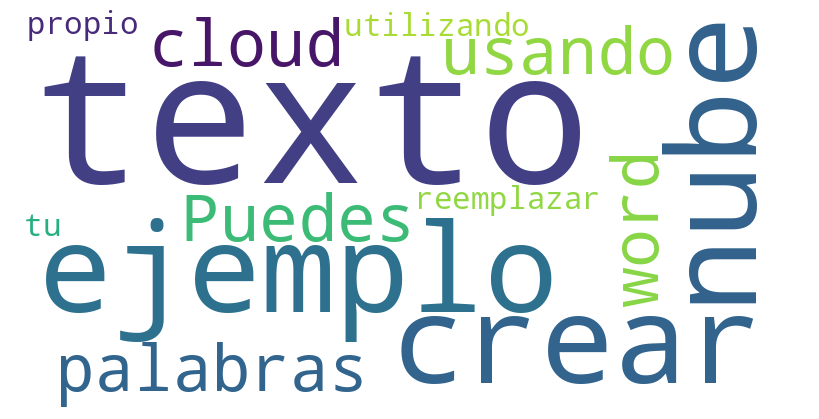

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Texto de ejemplo
text = "Este es un texto de ejemplo para crear una nube de palabras usando word cloud. Puedes reemplazar este texto utilizando tu propio texto."

# Definir stopwords en español
stopwords_es = set(STOPWORDS)
stopwords_es.update(["con", "que", "los", "para", "un", "una", "el", "la", "en", "y", "o", "de", "a", "se", "es", "al", "como", "por", "no", "su", "más", "pero", "si", "este", "esta", "eso", "esa", "todo", "todos", "todas", "cada", "cual", "cualquier", "algo", "alguna", "algún", "ningún", "ninguna", "ninguno", "otro", "otros", "otras", "sobre", "entre", "durante", "desde", "hasta", "también", "así", "mismo", "misma", "mismo", "misma", "tan", "tanto", "tanta", "muy", "poco", "poca", "poco", "nada", "solo", "sola", "solo", "sola", "siempre", "nunca", "jamás", "casi", "aproximadamente", "cerca", "lejos", "antes", "después", "ahora", "hoy", "ayer", "mañana", "luego", "mientras", "mientras tanto", "después de", "antes de", "durante", "sin", "aunque", "a pesar de", "debido a", "gracias a", "por qué", "cómo", "dónde", "cuándo", "quién", "qué", "cuál"])

# Crear un objeto WordCloud con stopwords en español
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords_es).generate(text)

# Mostramos la imagen generada
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
